# Word2vec from Scratch


https://jaketae.github.io/study/word2vec/

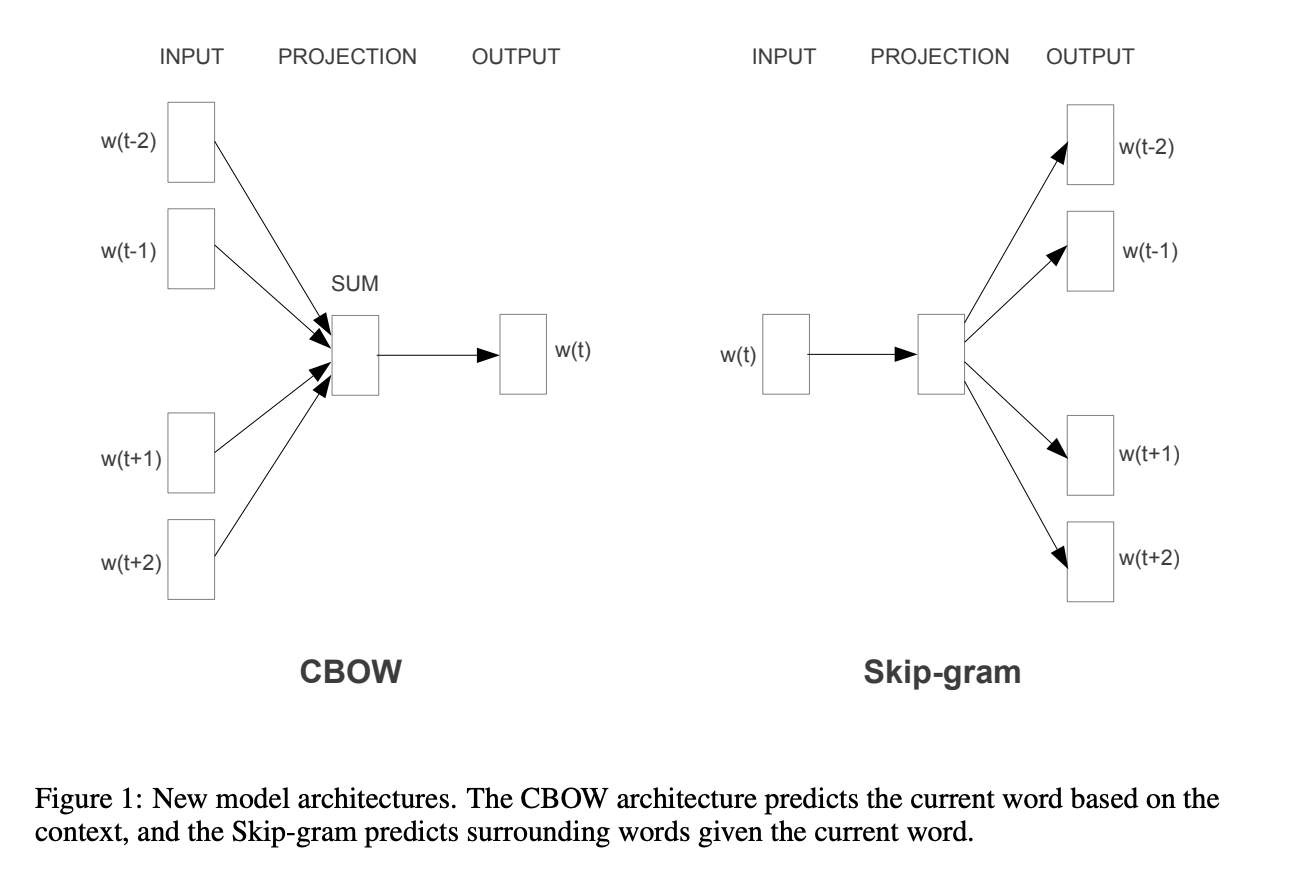

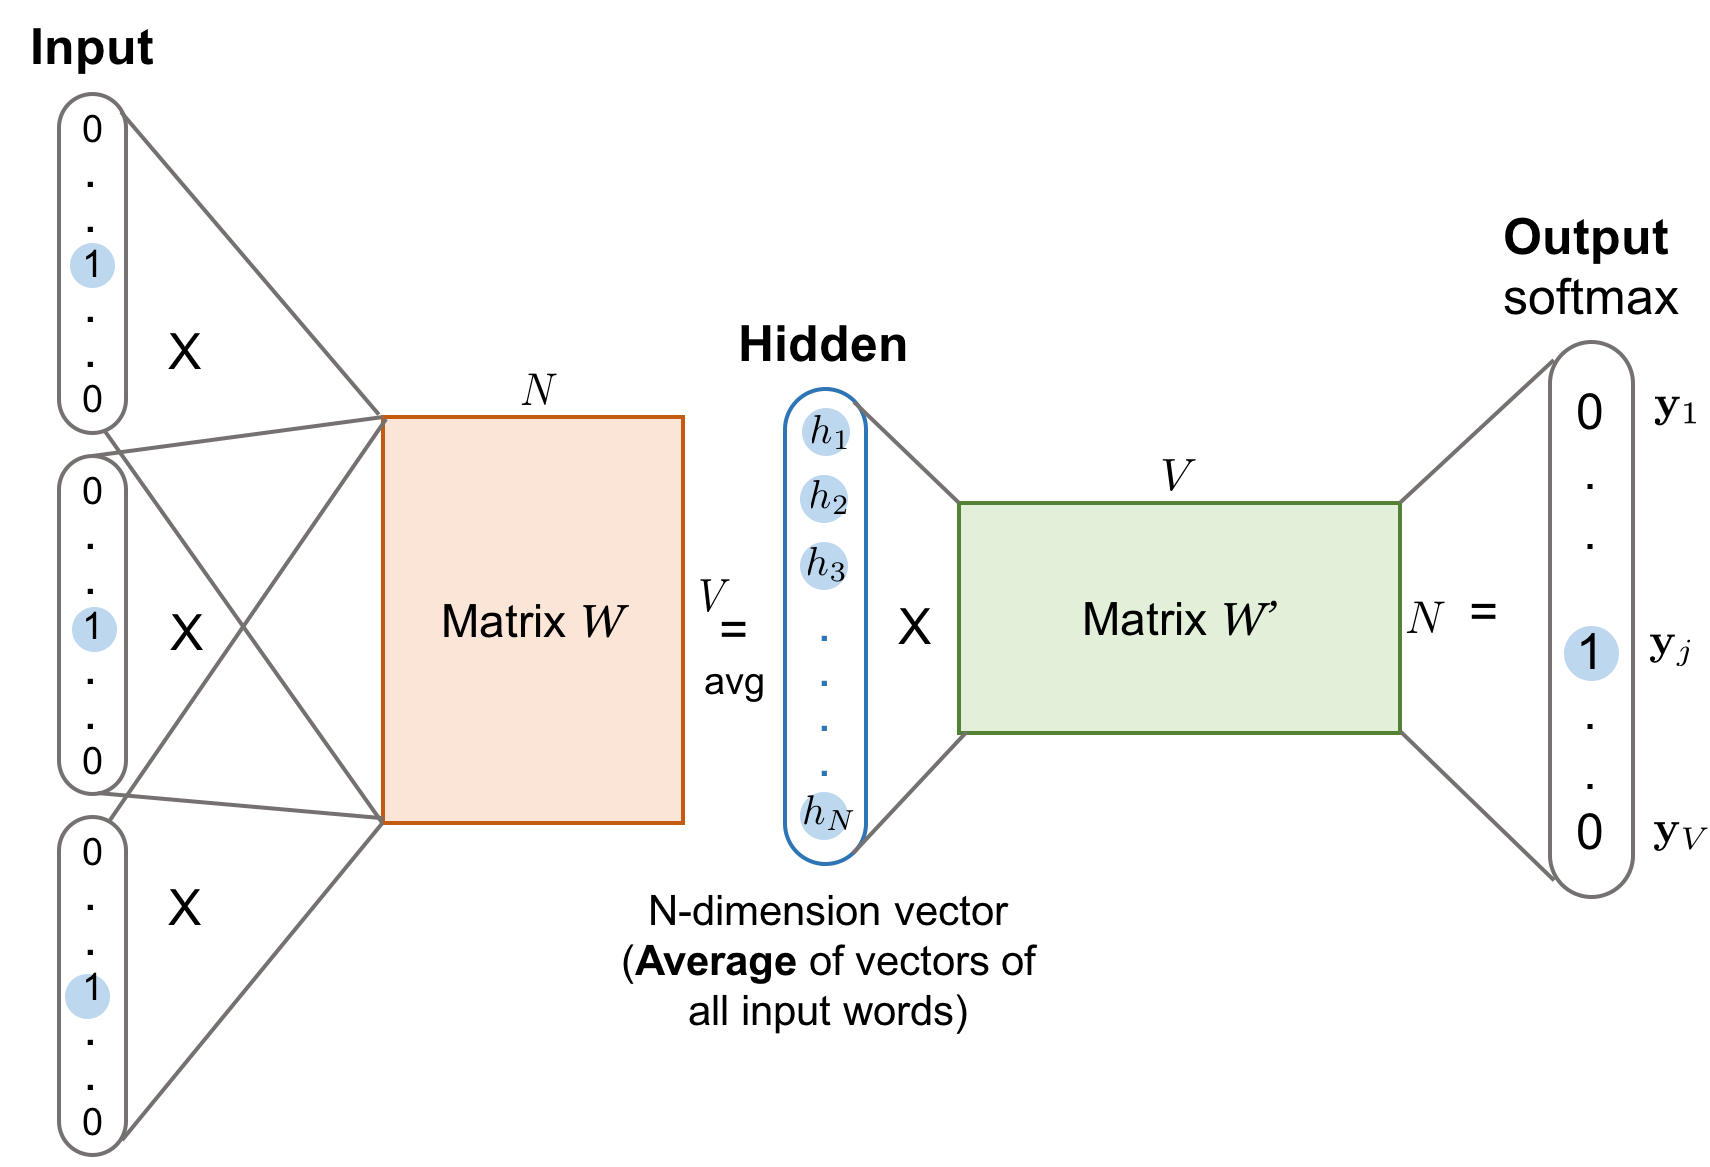

The CBOW (Continuous Bag-of-Words) model. Word vectors of multiple context words are averaged to get a fixed-length vector as in the hidden layer.

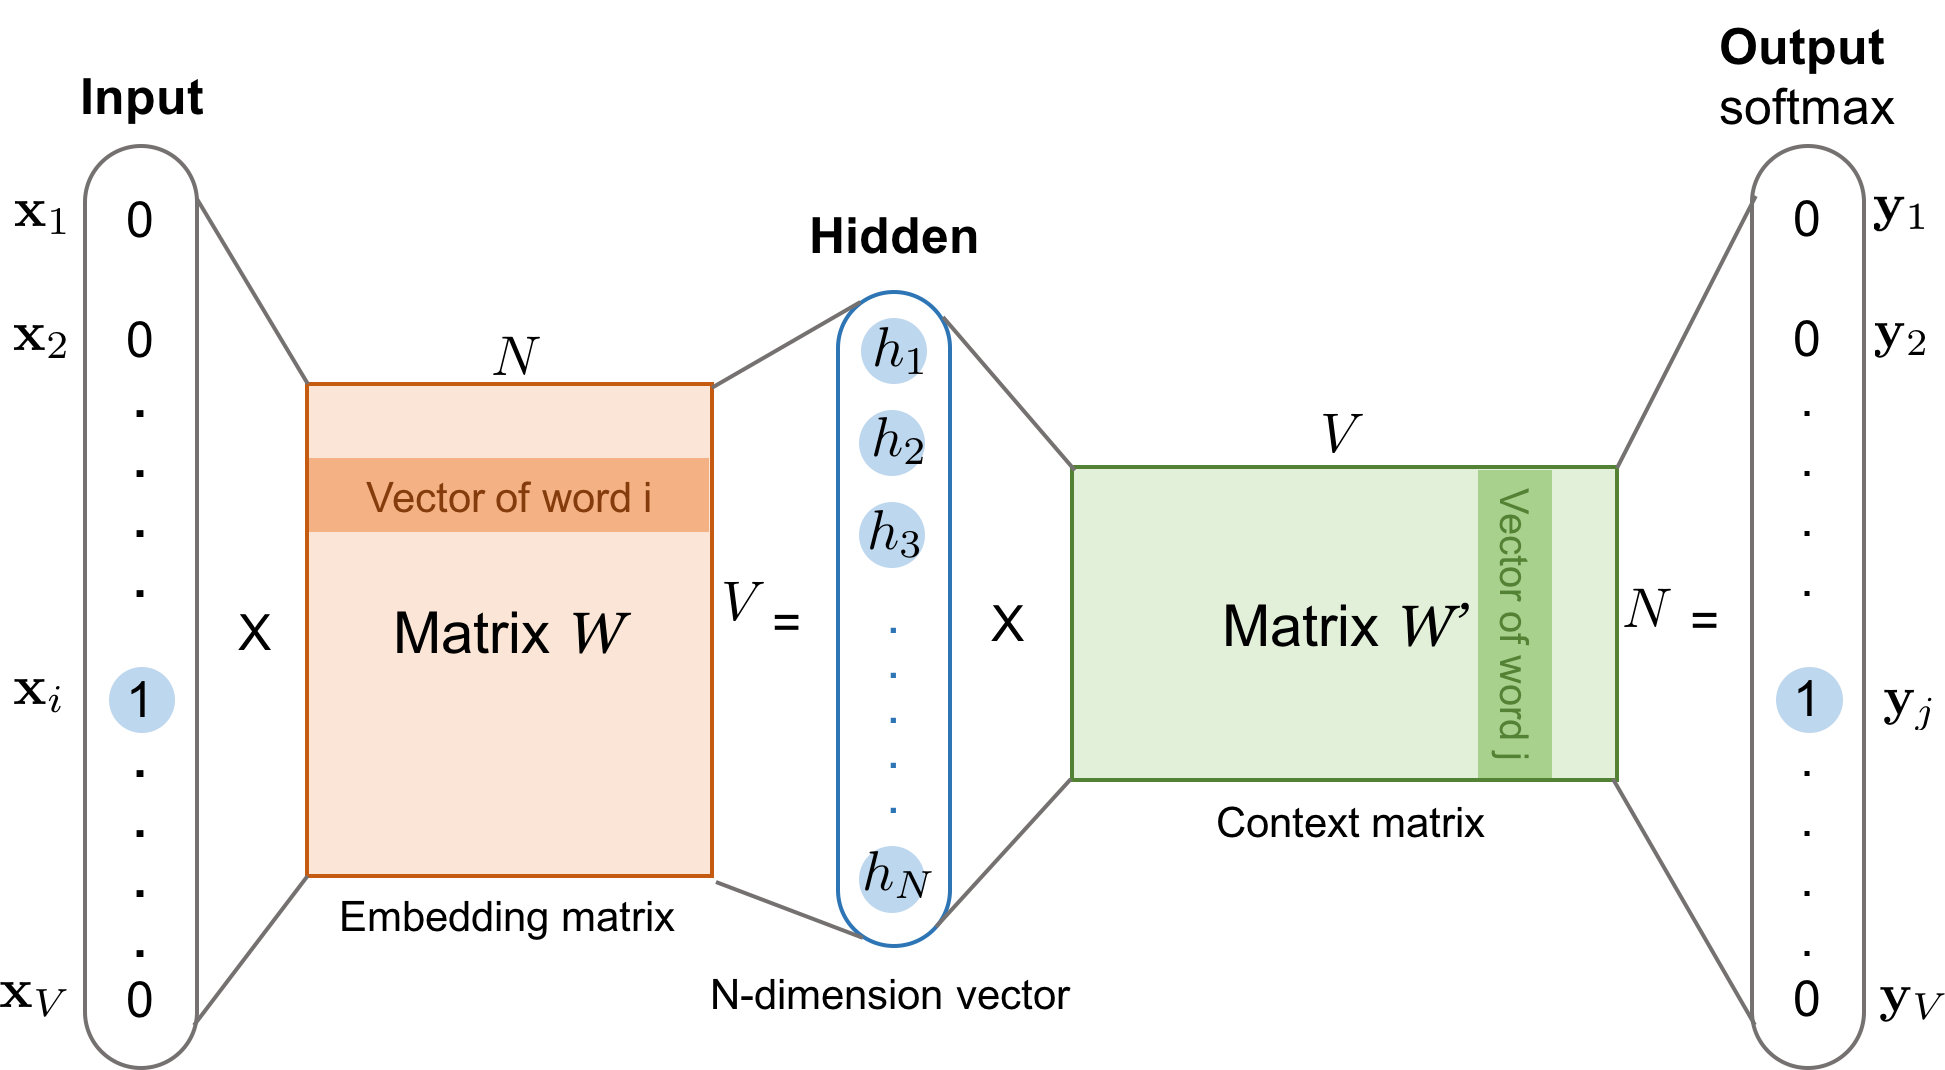

The skip-gram model. Both the input vector $x$ and the output $y$ are one-hot encoded word representations. The hidden layer is the word embedding of size $N$.

https://lilianweng.github.io/posts/2017-10-15-word-embedding/

## Data

In [ ]:
text = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''

In [ ]:
import re

def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

In [ ]:
tokens = tokenize(text)
tokens

['machine',
 'learning',
 'is',
 'the',
 'study',
 'of',
 'computer',
 'algorithms',
 'that',
 'improve',
 'automatically',
 'through',
 'experience',
 'it',
 'is',
 'seen',
 'as',
 'a',
 'subset',
 'of',
 'artificial',
 'intelligence',
 'machine',
 'learning',
 'algorithms',
 'build',
 'a',
 'mathematical',
 'model',
 'based',
 'on',
 'sample',
 'data',
 'known',
 'as',
 'training',
 'data',
 'in',
 'order',
 'to',
 'make',
 'predictions',
 'or',
 'decisions',
 'without',
 'being',
 'explicitly',
 'programmed',
 'to',
 'do',
 'so',
 'machine',
 'learning',
 'algorithms',
 'are',
 'used',
 'in',
 'a',
 'wide',
 'variety',
 'of',
 'applications',
 'such',
 'as',
 'email',
 'filtering',
 'and',
 'computer',
 'vision',
 'where',
 'it',
 'is',
 'difficult',
 'or',
 'infeasible',
 'to',
 'develop',
 'conventional',
 'algorithms',
 'to',
 'perform',
 'the',
 'needed',
 'tasks']

In [ ]:
def mapping(tokens):
    word_to_id = {}
    id_to_word = {}

    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token

    return word_to_id, id_to_word

In [ ]:
word_to_id, id_to_word = mapping(tokens)
word_to_id

{'decisions': 0,
 'email': 1,
 'without': 2,
 'do': 3,
 'known': 4,
 'used': 5,
 'vision': 6,
 'sample': 7,
 'applications': 8,
 'to': 9,
 'improve': 10,
 'learning': 11,
 'develop': 12,
 'and': 13,
 'difficult': 14,
 'tasks': 15,
 'the': 16,
 'variety': 17,
 'on': 18,
 'data': 19,
 'order': 20,
 'are': 21,
 'conventional': 22,
 'mathematical': 23,
 'training': 24,
 'is': 25,
 'seen': 26,
 'a': 27,
 'study': 28,
 'such': 29,
 'of': 30,
 'computer': 31,
 'machine': 32,
 'so': 33,
 'infeasible': 34,
 'predictions': 35,
 'as': 36,
 'artificial': 37,
 'intelligence': 38,
 'where': 39,
 'perform': 40,
 'filtering': 41,
 'experience': 42,
 'subset': 43,
 'algorithms': 44,
 'that': 45,
 'or': 46,
 'it': 47,
 'based': 48,
 'programmed': 49,
 'make': 50,
 'through': 51,
 'build': 52,
 'wide': 53,
 'in': 54,
 'automatically': 55,
 'needed': 56,
 'model': 57,
 'being': 58,
 'explicitly': 59}

In [ ]:
# ["machine", "learning"]

In [ ]:
def concat(*iterables):
    for iterable in iterables:
        yield from iterable

def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

In [ ]:
import numpy as np

np.random.seed(42)

def generate_training_data(tokens, word_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)
    c = 0

    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i),
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))
            # print(c, tokens[i], tokens[j]); c += 1

    return np.asarray(X), np.asarray(y)

In [ ]:
X, y = generate_training_data(tokens, word_to_id, 2)

0 machine learning
1 machine is
2 learning machine
3 learning is
4 learning the
5 is machine
6 is learning
7 is the
8 is study
9 the learning
10 the is
11 the study
12 the of
13 study is
14 study the
15 study of
16 study computer
17 of the
18 of study
19 of computer
20 of algorithms
21 computer study
22 computer of
23 computer algorithms
24 computer that
25 algorithms of
26 algorithms computer
27 algorithms that
28 algorithms improve
29 that computer
30 that algorithms
31 that improve
32 that automatically
33 improve algorithms
34 improve that
35 improve automatically
36 improve through
37 automatically that
38 automatically improve
39 automatically through
40 automatically experience
41 through improve
42 through automatically
43 through experience
44 through it
45 experience automatically
46 experience through
47 experience it
48 experience is
49 it through
50 it experience
51 it is
52 it seen
53 is experience
54 is it
55 is seen
56 is as
57 seen it
58 seen is
59 seen as
60 seen a
61

In [ ]:
print(X.shape)
print(y.shape)

(330, 60)
(330, 60)


## Idea of Embedding

$$
\underbrace{
\begin{pmatrix}
0 & 1 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots
\end{pmatrix}
}_{\text{input}}
\cdot
\underbrace{
\begin{pmatrix}
2 & 1 & 7 \\
1 & 8 & 6 \\
9 & 0 & 4 \\
7 & 5 & 5 \\
5 & 1 & 2 \\
\end{pmatrix}
}_{\text{weight}}
=
\underbrace{
\begin{pmatrix}
1 & 8 & 6 \\
2 & 1 & 7 \\
7 & 5 & 5 \\
\vdots & \vdots & \vdots
\end{pmatrix}
}_{\text{embedding}} \tag{1}
$$

$$
\underbrace{
\begin{pmatrix}
1 & 8 & 6 \\
2 & 1 & 7 \\
7 & 5 & 5 \\
\vdots & \vdots & \vdots
\end{pmatrix}
}_{\text{embedding}}
\cdot
\underbrace{
\begin{pmatrix}
8 & 4 & 5 & 1 & 8 \\
1 & 6 & 2 & 5 & 7 \\
0 & 2 & 0 & 3 & 4 \\
\end{pmatrix}
}_{\text{weight}}
=
\underbrace{
\begin{pmatrix}
16 & 64 & 21 & 59 & 84 \\
17 & 28 & 12 & 26 & 51 \\
61 & 68 & 45 & 47 & 111 \\
\vdots & \vdots & \vdots & \vdots & \vdots
\end{pmatrix}
}_{\text{output}} \tag{2}
$$

$$
\text{softmax}
\left (
\underbrace{
\begin{pmatrix}
16 & 64 & 21 & 59 & 84 \\
17 & 28 & 12 & 26 & 51 \\
61 & 68 & 45 & 47 & 111 \\
\vdots & \vdots & \vdots & \vdots & \vdots
\end{pmatrix}
}_{\text{output}}
\right )
=
\underbrace{
\begin{pmatrix}
0.1 & 0.2 & 0.1 & 0.2 & 0.4 \\
0.2 & 0.2 & 0.1 & 0.2 & 0.3 \\
0.2 & 0.2 & 0.1 & 0.1 & 0.4 \\
\vdots & \vdots & \vdots & \vdots & \vdots
\end{pmatrix}
}_{\text{prediction}} \tag{3}
$$


$$
H(p, q) = - \sum_{x \in \chi} p(x) \log q(x) \tag{4}
$$

$$
H(p, q) = - p \cdot \log(q) \tag{5}
$$

$$
A_1 = X W_1 \\
A_2 = A_1 W_2 \\
Z = \text{softmax}(A_2) \tag{6}
$$

## Train

In [ ]:
def init_network(vocab_size, n_embedding):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    return model

In [ ]:
model = init_network(len(word_to_id), 10)


In [ ]:
def forward(model, X, return_cache=True):
    cache = {}

    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])

    if not return_cache:
        return cache["z"]
    return cache

Note: `@` is matrix multiplication. `*` is element-wise multiplication.

In [ ]:
def softmax(X):
    res = []
    for x in X:
        exp = np.exp(x)
        res.append(exp / exp.sum())
    return res

In [ ]:
(X @ model["w1"]).shape

(330, 10)

In [ ]:
(X @ model["w1"] @ model["w2"]).shape

(330, 60)

In [ ]:
def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)

In [ ]:
def backward(model, X, y, alpha):
    cache  = forward(model, X)
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    return cross_entropy(cache["z"], y)


## Test

<ipython-input-29-dd77ae3ce3a4>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


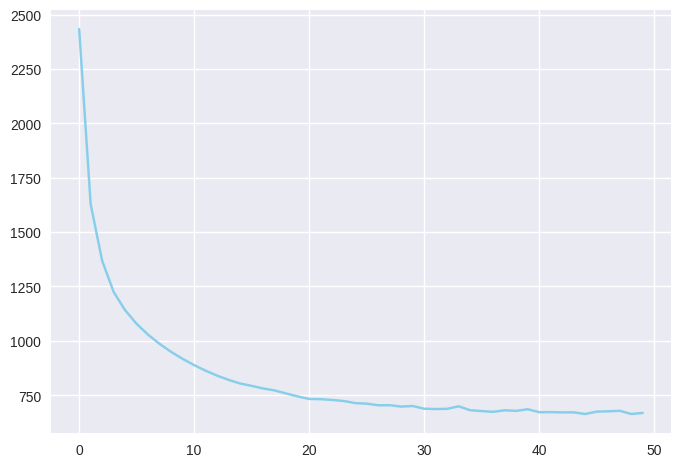

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")

n_iter = 50
learning_rate = 0.05

history = [backward(model, X, y, learning_rate) for _ in range(n_iter)]

plt.plot(range(len(history)), history, color="skyblue")
plt.show()

In [ ]:
learning = one_hot_encode(word_to_id["learning"], len(word_to_id))
result = forward(model, [learning], return_cache=False)[0]

for word in (id_to_word[id] for id in np.argsort(result)[::-1]):
    print(word)

machine
is
so
the
intelligence
build
are
algorithms
subset
difficult
learning
vision
needed
of
a
email
variety
computer
to
filtering
develop
improve
programmed
seen
applications
infeasible
tasks
do
on
study
mathematical
experience
such
artificial
training
wide
conventional
that
used
where
perform
known
or
it
and
explicitly
without
automatically
order
decisions
as
in
through
based
predictions
model
make
data
sample
being


## Embedding

In [ ]:
model["w1"]


array([[ 4.64913817e-01,  4.77558985e-01,  1.06289129e+00,
         1.67384326e+00,  1.29322228e+00, -1.48133175e+00,
         3.25147008e-01,  5.75381032e-01, -1.43004127e+00,
        -8.87712218e-01],
       [-6.34824917e-01,  5.29789080e-01, -9.26096984e-01,
        -2.44760598e+00, -1.07805996e-01,  5.31629863e-01,
         8.66929487e-01, -1.81772816e-01,  1.54149254e+00,
        -2.68836455e-01],
       [ 1.14789330e+00, -4.97888459e-01,  1.48814183e+00,
        -1.64845817e-01, -7.24694800e-02, -9.02963571e-01,
        -8.51953528e-01,  1.48111870e+00, -1.34853995e+00,
        -1.69823941e+00],
       [-7.39954481e-01,  1.95200540e+00,  4.49225801e-01,
        -5.59182644e-01, -4.91707809e-01, -1.34543149e+00,
        -8.58801314e-01, -2.11688891e+00,  1.28013675e+00,
        -3.94447166e-01],
       [ 7.22801532e-01,  4.08596537e-01, -5.01681060e-01,
        -9.88804621e-01, -1.88407622e+00, -1.39803051e-01,
         1.43039913e+00,  9.54212053e-01,  5.66366887e-01,
        -1.

In [ ]:
def get_embedding(model, word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print("`word` not in corpus")
    one_hot = one_hot_encode(idx, len(word_to_id))
    return forward(model, one_hot)["a1"]

In [ ]:
get_embedding(model, "machine")

array([-0.55791524, -0.70904738, -0.24437281,  1.79098553, -1.09275065,
        0.07227576, -0.92129241,  0.62836012,  1.24697987, -0.48612088])

# FastText

FastText is an open-source, free, lightweight library that allows users to learn text representations and text classifiers. It works on standard, generic hardware. Models can later be reduced in size to even fit on mobile devices.

https://fasttext.cc/

We will cover two tutorials provideded by fasttext.

- supervised: Text classification (https://fasttext.cc/docs/en/supervised-tutorial.html)
- unsupervised: Word representations (https://fasttext.cc/docs/en/unsupervised-tutorial.html)

If you do not want to trrain your own language model, you may use pre-trained ones. https://fasttext.cc/docs/en/english-vectors.html

# Transformer

Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin,

"Attention Is All You Need,"

CoRR, abs/1706.03762, 2017,

http://arxiv.org/abs/1706.03762.



The encoder maps an input sequence of symbol representations ($x_1$, $\dots$, $x_n$) to a sequence
of continuous representations $z$ = ($z_1$, $\dots$, $z_n$). Given $z$, the decoder then generates an output
sequence ($y_1$, $\dots$, $y_m$) of symbols one element at a time. At each step the model is auto-regressive, consuming the previously generated symbols as additional input when generating the next.


$N = 6$

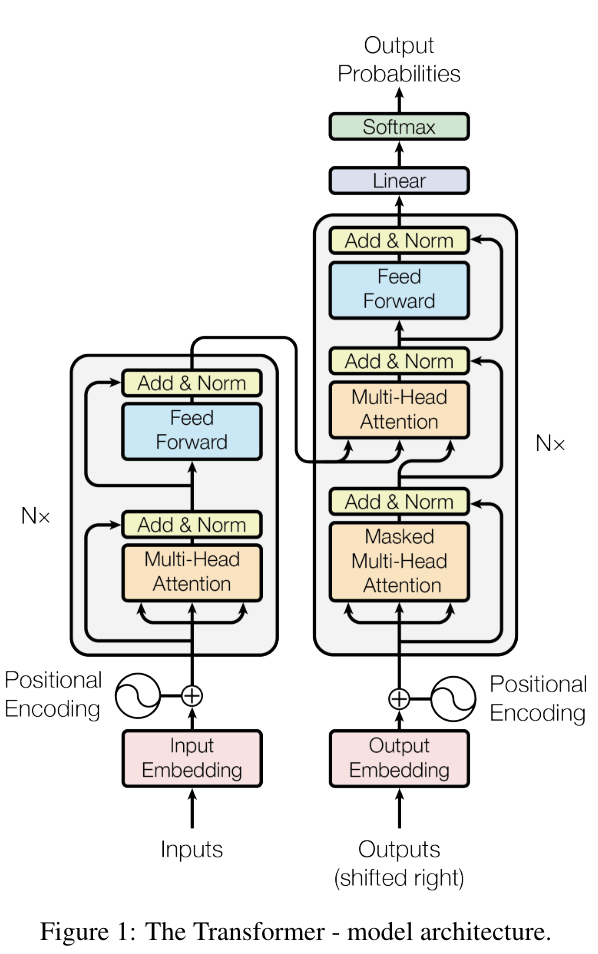

For cross-attention, note that the queries usually come from the decoder, and the keys and values usually come from the encoder.

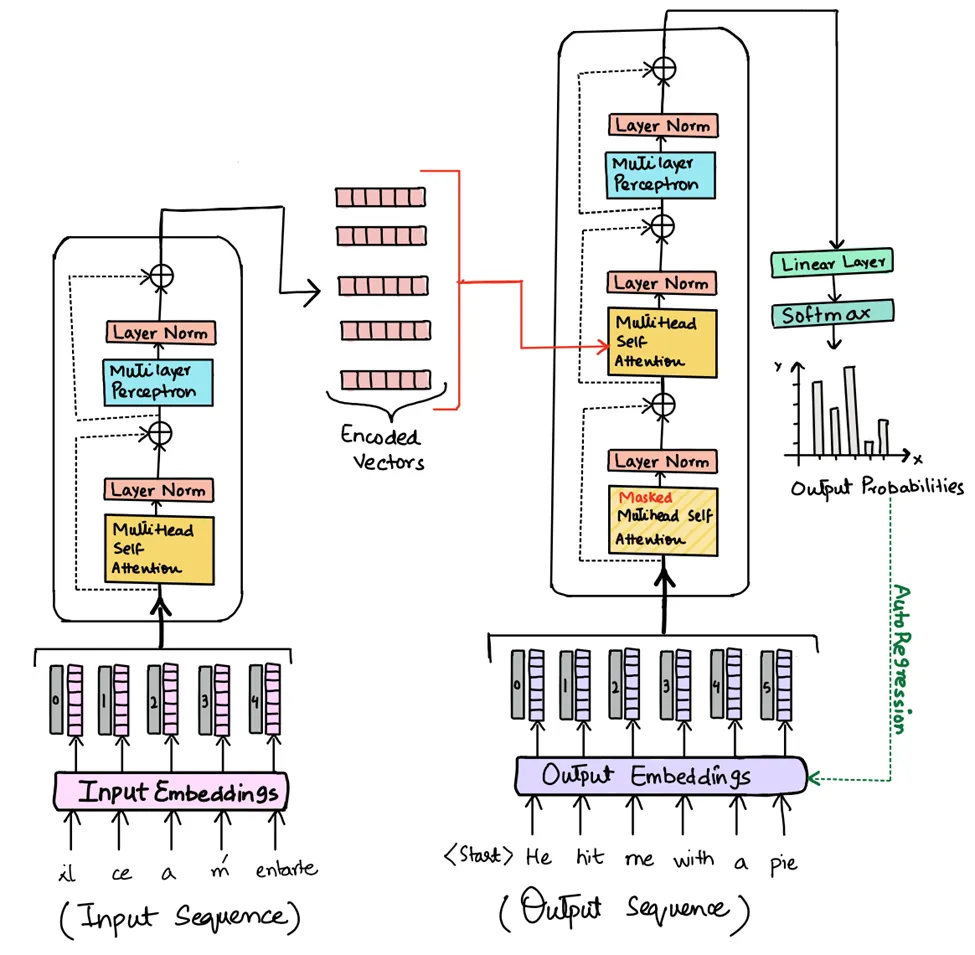

https://medium.com/machine-intelligence-and-deep-learning-lab/transformer-the-self-attention-mechanism-d7d853c2c621

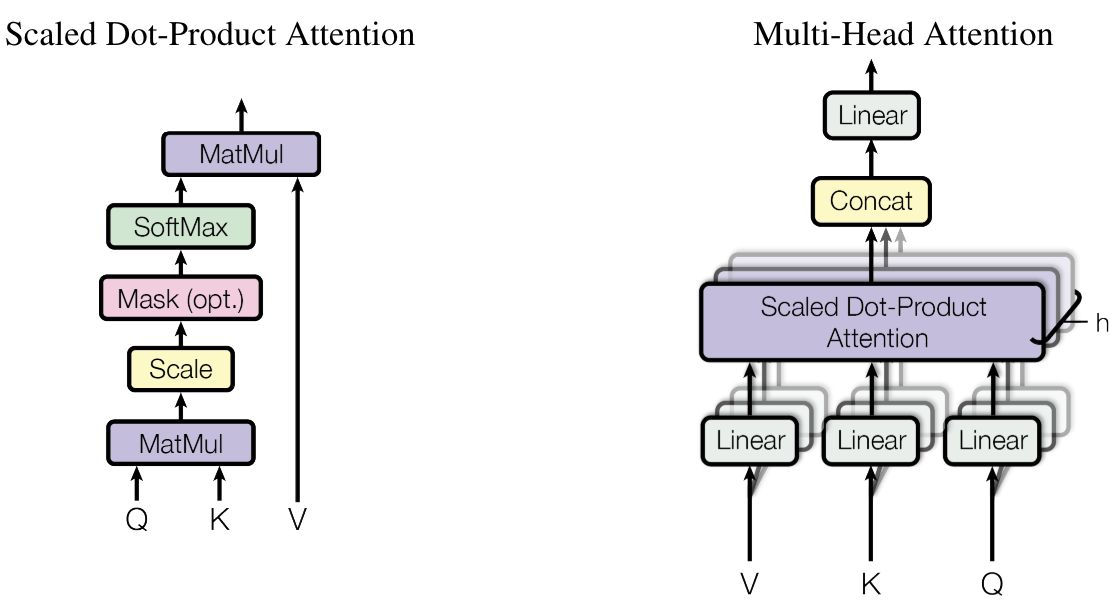

(Dot-product) Attention($Q$, $K$, $V$) = softmax($\frac{QK^T}{\sqrt{d_k}}V$)

$d_k$ is the dimension of $Q$ and $K$; $d_v$ is the dimension of $V$.

https://sebastianraschka.com/blog/2023/self-attention-from-scratch.html

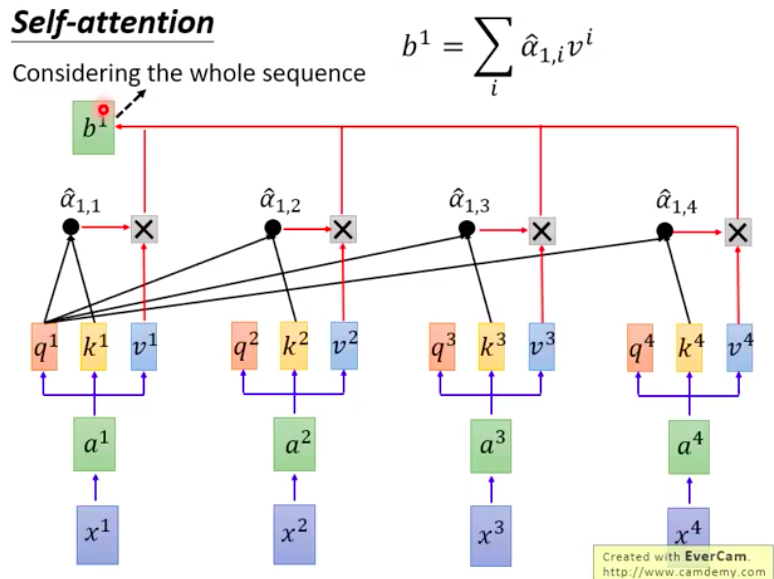


https://www.youtube.com/watch?v=ugWDIIOHtPA by Prof.Hung-yi Lee.

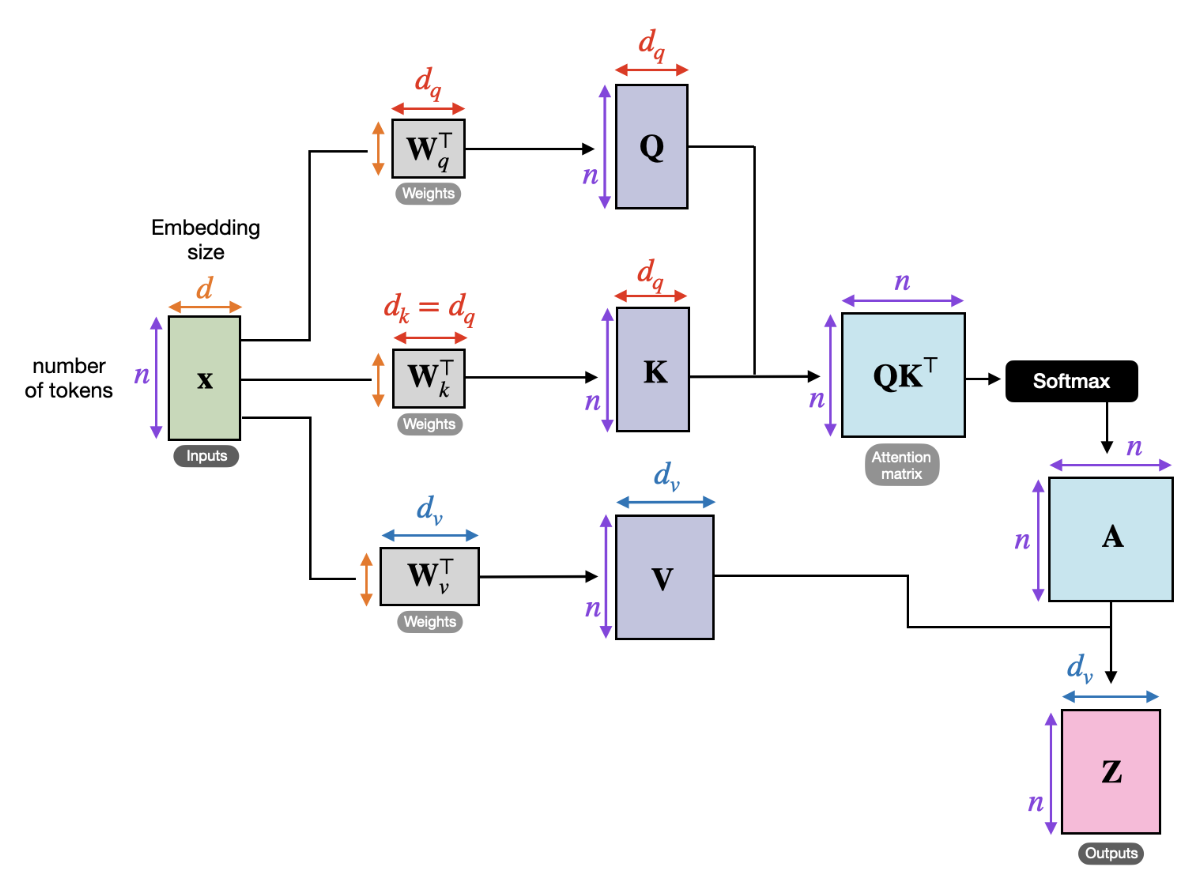

ref: https://colab.research.google.com/drive/1rPk3ohrmVclqhH7uQ7qys4oznDdAhpzF

# Text Classification

* Basic text classification (https://www.tensorflow.org/tutorials/keras/text_classification)
* Text classification with an RNN (N03-2, covered in RNN, https://www.tensorflow.org/text/tutorials/text_classification_rnn)

* Classify text with BERT (https://www.tensorflow.org/text/tutorials/classify_text_with_bert)